In [107]:
import requests

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline

In [109]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Gather Data

## Import Image Predictions Data 

In [110]:
image_pred = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [111]:
image_pred.status_code

200

Save image predictions data to a tsv file.

In [112]:
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(image_pred.content)

## Import Tweet Info

In [113]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [114]:
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

In [115]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')

In [116]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [481]:
tweet_ids = df_ta.tweet_id.values
len(tweet_ids)

2356

`Note`: Initial attempt at downloading tweet data failed after 900 ID's, due to rate limit. Modified tweepy api to "wait on rate limit". Then resumed downloading. This time it was successful.

In [482]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 1800
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'a') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids[900:]: # Initial try: twitter rate limit mechanism limits each session to 900
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1801: 758740312047005698
Success
1802: 758474966123810816
Success
1803: 758467244762497024
Success
1804: 758405701903519748
Success
1805: 758355060040593408
Success
1806: 758099635764359168
Success
1807: 758041019896193024
Success
1808: 757741869644341248
Success
1809: 757729163776290825
Success
1810: 757725642876129280
Success
1811: 757611664640446465
Success
1812: 757597904299253760
Success
1813: 757596066325864448
Success
1814: 757400162377592832
Success
1815: 757393109802180609
Success
1816: 757354760399941633
Success
1817: 756998049151549440
Success
1818: 756939218950160384


KeyboardInterrupt: 

`Results`: only 2 ID's are missing. {754011816964026368: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 680055455951884288: TweepError([{'code': 144, 'message': 'No status found with that ID.'}])}

## Load Data Files

In [119]:
df_ta = pd.read_csv('twitter-archive-enhanced.csv')
df_ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [120]:
df_ta.tweet_id.nunique()

2356

In [477]:
df_ip = pd.read_csv('image_predictions.tsv',sep = '\t')
df_ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [122]:
df_ip.tweet_id.nunique()

2075

In [ ]:
df_tj = pd.read_json('tweet_json.txt', lines = True)

# Assess and Clean Data

## Assess - Data Frames Structure

In [479]:
df_tj.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_tj.info()

In [ ]:
df_tj.describe()

In [480]:
df_tj[df_tj['id']!=df_tj['id_str'].astype('int64')]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
6,2017-07-28 16:27:12+00:00,890971913173991426,890971913173991424,Meet Jax. He enjoys ice cream so much he gets ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
9,2017-07-26 15:59:51+00:00,890240255349198849,890240255349198848,This is Cassie. She is a college pup. Studying...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
11,2017-07-25 16:11:53+00:00,889880896479866881,889880896479866880,This is Bruno. He is a service shark. Only get...,False,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 889880888800096258, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,2015-11-16 00:49:46+00:00,666055525042405380,666055525042405376,Here is a Siberian heavily armored polar bear ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666055517517848576, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:30:50+00:00,666050758794694657,666050758794694656,This is a truly beautiful English Wilson Staff...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666050754986266625, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2330,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


>Tidiness issue #1: information about the tweets are in 3 files, they need to be combined into 1 data frame. Each row in the combined data frame needs to contain information from all 3 sources.

>Quality issue #1: 825 entries in tweet_json.txt have 'id' and 'id_str' mismatch. Also 'id_str' is int type, not str type.

## Clean - Data Frames Structure

### Define
* Combine all 3 files into 1 data frame, keep only interested columns in tweet_json.txt

* The tweet_json.txt id_str issue dosen't need to be addressed, since the column will not be retained in the combined data frame.

### Code and Test

Identify columns of interest in df_tj

In [125]:
# select to keep only retweet_cnt and favorite_cnt
df_tj.drop(columns = df_tj.columns.difference(['id', 'retweet_count', 'favorite_count']), inplace = True)

## Add retweet count and favorit count to the data frame

In [234]:
df = pd.merge(df_ta, df_tj, left_on = 'tweet_id', right_on = 'id')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,892420643555336193,7847,36815
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,892177421306343426,5812,31697
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,891815181378084864,3847,23875
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,891689557279858688,8013,40140
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,891327558926688256,8657,38337


In [235]:
df.drop(columns = 'id', inplace = True)

## Combine with dog image predictions data
Only keep original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets
Goal: assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.

In [236]:
# combine with image dataset, only keep those that have images.
df = pd.merge(df, df_ip, how = 'inner', on = 'tweet_id' )
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [238]:
#save combined dataset to a file
df.to_csv('combine_tweet_data.csv', index = False)

## Assess - Data Values

In [12]:
df = pd.read_csv('combine_tweet_data.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2061 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2061 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2061 non-null object
rating_numerator              2061 non-null int64
rating_denominator            2061 non-null int64
name                          2061 non-null object
doggo                         2061 non-null object
floofer                       2061 non-null object
pupper                        2061 non-null object
puppo                         2061 non-null object
retweet_count                 2061 

In [505]:
df.retweeted_status_id.value_counts()

7.076109e+17    1
7.827226e+17    1
8.224891e+17    1
7.638376e+17    1
8.327664e+17    1
               ..
7.848260e+17    1
8.482894e+17    1
6.675484e+17    1
7.902771e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 74, dtype: int64

In [14]:
df.rating_denominator.value_counts()

10     2043
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [15]:
df[df.rating_denominator!=10].shape[0]

18

In [527]:
df.rating_numerator.value_counts()

12      472
10      428
11      413
13      275
9       151
8        95
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
0         2
80        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [516]:
df[df.rating_numerator == 26] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1440,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [124]:
df.loc[1440].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

The numerator/denominator is 11.26/10

In [518]:
df[df.rating_numerator == 27] # it's 11.27/10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
603,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,1,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


In [125]:
df.loc[603].text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

The numerator/denominator is 11.27/10

In [521]:
df[df.rating_numerator == 75] # it's 9.75 / 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [126]:
df.loc[548].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

The numerator/denominator is 9.75/10

In [522]:
df[df.rating_denominator == 150] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
724,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True


In [19]:
df.loc[724].text

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

It's multiple dogs, 165/150

In [517]:
df[df.rating_numerator == 1776] # represents year of US independence

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
791,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [519]:
df[df.rating_numerator == 420]  # it's Snoop Dog, the person

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1783,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,...,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [294]:
df.name.value_counts().head(20)

None       586
Cooper      10
Oliver      10
Charlie     10
Tucker       9
Penny        9
Lucy         9
Winston      8
Sadie        8
Toby         7
Lola         7
Daisy        7
the          7
Jax          6
Koda         6
Bo           6
Bella        6
Stanley      6
Milo         5
Louis        5
Name: name, dtype: int64

In [508]:
sorted (df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bluebert',
 'Bo',
 '

Dog names: a sorted unique values list of dog names show that there are names that seem to be erroneous: 'a','actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not',  'officially', 'one', 'quite', 'space', 'such', 'the', 'unacceptable', 'very'. 

> Data quality issues: <br> #2: 74 tweets are retweets <br> #3: 18 tweets have rating_denominator != 10 <br> #4: there are ~20 entries with values > 20, while the rest are <= 14. <br> #5: Some dog names are mistaken

For issue #4, distribution of values greater than 14 suddenly drops dramatically, while the value ranges extend far, indicating they are out-lier data points. Detailed investigation suggest mistaken value extraction, or very large number due to multiple dogs in the same picture.

## Clean - Data Values

### Define
* Remove retweets
* Clean rating_denominator numbers != 10
* Clean rating_numerator numbers > 20 
* Replace mistaken dog names with Nan

### Code

In [240]:
#Remove retweets
df.drop(index = df[df['retweeted_status_id'].isna() == False].index, inplace = True)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      1987 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1987 non-null object
source                        1987 non-null object
text                          1987 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1987 non-null object
rating_numerator              1987 non-null int64
rating_denominator            1987 non-null int64
name                          1987 non-null object
doggo                         1987 non-null object
floofer                       1987 non-null object
pupper                        1987 non-null object
puppo                         1987 non-null object
retweet_count                 1987 non

In [242]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.987000e+03,2.300000e+01,2.300000e+01,0.0,0.0,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1.987000e+03
mean,7.356264e+17,6.978112e+17,4.196984e+09,NaN,NaN,12.280825,10.533971,2503.533971,8411.970307,1.203322,0.593317,1.344725e-01,6.037114e-02
std,6.739210e+16,4.359384e+16,0.000000e+00,NaN,NaN,41.570741,7.333532,4479.572143,12374.200684,0.561369,0.271959,1.005706e-01,5.091543e-02
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,0.000000,2.000000,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758218e+17,6.732411e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,560.000000,1807.000000,1.000000,0.361531,5.409535e-02,1.624950e-02
50%,7.083495e+17,6.757073e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,1209.000000,3782.000000,1.000000,0.587342,1.175080e-01,4.953060e-02
75%,7.873602e+17,7.031489e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,2845.500000,10486.000000,1.000000,0.844583,1.950575e-01,9.180755e-02
max,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,1776.000000,170.000000,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [250]:
df.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

Clean up some rating_numerator and denominator numbers

Denominator values to be cleaned:

Denominator | count
------------|---
50     |   3
11     |   2
80     |   2
7      |   1
170    |   1
150    |   1
130    |   1
120    |   1
110    |   1
90     |   1
70     |   1
40     |   1
20     |   1
2      |   1

In [37]:
df[df.rating_denominator ==50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
990,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1054,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1120,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,...,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [49]:
df.loc[1036,['rating_numerator', 'rating_denominator']] = [10, 10]

In [39]:
df.loc[990,'text'] # it's 11/10

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [56]:
df.loc[990,['rating_numerator', 'rating_denominator']] = [11, 10]

In [40]:
df.loc[1054,'text'] # it's 45/50, or 9/10

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [57]:
df.loc[1054,['rating_numerator', 'rating_denominator']] = [9, 10]

In [41]:
df.loc[1120,'text'] #its 60/50, or 12/10

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [58]:
df.loc[1120,['rating_numerator', 'rating_denominator']] = [12, 10]

In [42]:
df[df.rating_denominator ==11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
865,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1394,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,...,1,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [43]:
df.loc[865,'text'] # it's 14/10

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [59]:
df.loc[865,['rating_numerator', 'rating_denominator']] = [14, 10]

In [44]:
df.loc[1394,'text'] # it's 10/10

'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5'

In [60]:
df.loc[1394,['rating_numerator', 'rating_denominator']] = [10, 10]

In [45]:
df[df.rating_denominator ==80]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1036,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1559,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,...,1,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True


In [46]:
df.loc[1036,'text'] #it's same as 10/10

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [49]:
df.loc[1036,['rating_numerator', 'rating_denominator']] = [10, 10]

In [47]:
df.loc[1559,'text'] #it's same as 11/10

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [48]:
df.loc[1559,['rating_numerator', 'rating_denominator']] = (11, 10)

In [50]:
df[df.rating_denominator ==7]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
406,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [51]:
df.loc[406,'text'] #there is no rating

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [52]:
df.drop(index = 406, inplace = True) # each row has to have rating

In [53]:
df[df.rating_denominator ==2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2040,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,...,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [54]:
df.loc[2040,'text'] # it's 9/10

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [61]:
df.loc[2040,['rating_numerator', 'rating_denominator']] = [9, 10]

In [73]:
df[df.rating_denominator ==20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [70]:
ind = df[df.rating_denominator ==20].index

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
956,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True


In [66]:
df.loc[956, 'text']

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [71]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [13, 10]

In [74]:
ind = df[df.rating_denominator ==40].index
ind

Int64Index([1196], dtype='int64')

In [75]:
df.loc[1196, 'text']

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [76]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [77]:
ind = df[df.rating_denominator ==70].index
ind

Int64Index([336], dtype='int64')

In [78]:
df.loc[336, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [79]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [12, 10]

In [80]:
ind = df[df.rating_denominator ==90].index
ind

Int64Index([1011], dtype='int64')

In [81]:
df.loc[1011, 'text']

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [116]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [83]:
ind = df[df.rating_denominator ==110].index
ind

Int64Index([1369], dtype='int64')

In [88]:
df.loc[1369, 'text']

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [112]:
df.loc[1369,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [107]:
ind = df[df.rating_denominator ==120].index
ind

Int64Index([1500], dtype='int64')

In [108]:
df.loc[1500, 'text']

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [114]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [12,10 ]

In [117]:
ind = df[df.rating_denominator ==130].index
ind

Int64Index([1368], dtype='int64')

In [118]:
df.loc[1368, 'text']

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [119]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

In [121]:
ind = df[df.rating_denominator ==170].index
ind

Int64Index([913], dtype='int64')

In [122]:
df.loc[913, 'text']

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [123]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [12,10 ]

In [ ]:
ind = df[df.rating_denominator ==150].index
ind

In [ ]:
df.loc[724, 'text']

In [ ]:
df.loc[ind,['rating_numerator', 'rating_denominator']] = [11,10 ]

Clean up numerators

In [23]:
df.loc[1440,'rating_numerator'] = 11.26

In [26]:
df.loc[603,'rating_numerator'] = 11.27

In [521]:
df[df.rating_numerator == 75] # it's 9.75 / 10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
548,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True


In [128]:
df.loc[548,'rating_numerator'] = 9.75

In [35]:
#drop row 791, as 1776 out of 10 is a data outlier
df.drop(index = 791, inplace = True) # represents year of US independence

In [36]:
# drop row 1783, which is not a dog
df.drop(index = 1783, inplace = True)  # it's Snoop Dog, the person

### Test

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2060
Data columns (total 30 columns):
tweet_id                      2058 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2058 non-null object
source                        2058 non-null object
text                          2058 non-null object
retweeted_status_id           74 non-null float64
retweeted_status_user_id      74 non-null float64
retweeted_status_timestamp    74 non-null object
expanded_urls                 2058 non-null object
rating_numerator              2058 non-null float64
rating_denominator            2058 non-null int64
name                          2058 non-null object
doggo                         2058 non-null object
floofer                       2058 non-null object
pupper                        2058 non-null object
puppo                         2058 non-null object
retweet_count                 205

In [130]:
df.rating_numerator.value_counts()

12.00    475
10.00    430
11.00    421
13.00    276
9.00     152
8.00      95
7.00      51
14.00     39
5.00      34
6.00      32
3.00      19
4.00      15
2.00       9
1.00       4
0.00       2
15.00      1
11.27      1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [131]:
df.rating_denominator.value_counts()

10    2058
Name: rating_denominator, dtype: int64

Now the rating numbers are all normalized

### Code

In [252]:
# remove 'in_reply_to' fields, can't do anything with the 22 non-null items
df[df.in_reply_to_user_id.isna()==False].iloc[0].expanded_urls

'https://twitter.com/dog_rates/status/863079547188785154/photo/1'

In [253]:
df.drop(columns = ['in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

In [412]:
mis_list = ['a','actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not',
            'officially', 'one', 'quite', 'space', 'such', 'the', 'unacceptable', 'very']

In [413]:
#replace erroneous dog names with 'None'
df.name.replace(to_replace = mis_list , value = 'None', inplace = True)

### Test

In [414]:
sorted (df.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',
 'Blue',
 'Bo',
 'Bob',
 'Bobb'

Mistaken names are gone

In [266]:
df.to_csv('df_1.csv', index = False)

## Assess -  Dog Types

In [ ]:
df = pd.read_csv('df_1.csv')

In [254]:
df.doggo.value_counts()

None     1891
doggo      73
Name: doggo, dtype: int64

In [255]:
df.floofer.value_counts()

None       1956
floofer       8
Name: floofer, dtype: int64

In [256]:
df.pupper.value_counts()

None      1753
pupper     211
Name: pupper, dtype: int64

In [257]:
df.puppo.value_counts()

None     1941
puppo      23
Name: puppo, dtype: int64

> Tidiness issue #2: there are 4 columns of dog types: doggo, pupper, floofer, puppo. These dog types should be combined into 1 column 

## Clean -  Dog Types

### Define

* Consolidate dog types. If the tweet has more than 1 dog types, gather them in a list.

## Code & Test

In [258]:
type_df = pd.melt(df, id_vars = ['tweet_id'], value_vars= ['pupper', 'puppo', 'floofer', 'doggo'], var_name = 'type')
type_df

,tweet_id,type,value
0,892420643555336193,pupper,None
1,892177421306343426,pupper,None
2,891815181378084864,pupper,None
3,891689557279858688,pupper,None
4,891327558926688256,pupper,None
...,...,...,...
7851,666049248165822465,doggo,None
7852,666044226329800704,doggo,None
7853,666033412701032449,doggo,None
7854,666029285002620928,doggo,None


In [259]:
type_df.value.value_counts()

None       7541
pupper      211
doggo        73
puppo        23
floofer       8
Name: value, dtype: int64

In [260]:
type_df.drop(index = type_df[type_df.value =='None'].index, inplace = True)

In [261]:
type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 28 to 6803
Data columns (total 3 columns):
tweet_id    315 non-null int64
type        315 non-null object
value       315 non-null object
dtypes: int64(1), object(2)
memory usage: 9.8+ KB


In [262]:
type_df.value.value_counts()

pupper     211
doggo       73
puppo       23
floofer      8
Name: value, dtype: int64

In [263]:
type_df.type.value_counts()

pupper     211
doggo       73
puppo       23
floofer      8
Name: type, dtype: int64

In [264]:
type_df.tail()

,tweet_id,type,value
6724,732375214819057664,doggo,doggo
6747,727644517743104000,doggo,doggo
6760,724771698126512129,doggo,doggo
6779,719991154352222208,doggo,doggo
6803,716080869887381504,doggo,doggo


In [265]:
# 'value' and 'type' values are identical
type_df.drop(columns = 'value', inplace = True)

In [284]:
type_df[type_df.tweet_id.duplicated()==True]

,tweet_id,type
6039,855851453814013952,doggo
6045,854010172552949760,doggo
6227,817777686764523521,doggo
6283,808106460588765185,doggo
6305,802265048156610565,doggo
6311,801115127852503040,doggo
6395,785639753186217984,doggo
6535,759793422261743616,doggo
6585,751583847268179968,doggo
6675,741067306818797568,doggo


In [285]:
type_df[type_df['tweet_id']==855851453814013952]

,tweet_id,type
2111,855851453814013952,puppo
6039,855851453814013952,doggo


In [286]:
dup_id = (type_df[type_df.tweet_id.duplicated()==True])
len(dup_id)

11

11 entries in dog types have duplicated types: 'doggo' and one other type. 
Combine each pair into a list, and enter into type column, replacing the original rows

In [287]:
dup_types = type_df[type_df.tweet_id.isin(dup_id)].copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 28 to 6803
Data columns (total 2 columns):
tweet_id    304 non-null int64
type        304 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [ ]:
dup_list = dup_types.groupby('tweet_id').apply(list)
dup_list.reset_index()
dup_list

In [ ]:
###############
type_df.tweet_id.isin(dup_id)

In [ ]:
#
type_df.drop(index = type_df[type_df.tweet_id.isin(dup_id) ].index, inplace = True, )

In [ ]:
type_df.append(dup_list,)

In [290]:
df = pd.merge(df, type_df, how = 'left', on = 'tweet_id')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,NaN


In [268]:
df.type.value_counts()

pupper     211
doggo       73
puppo       23
floofer      8
Name: type, dtype: int64

In [296]:
# remove 'doggo', ... 'pupper' columns
df.drop(columns = ['doggo', 'pupper', 'floofer', 'puppo'], inplace = True)

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 1963
Data columns (total 22 columns):
tweet_id              1964 non-null int64
timestamp             1964 non-null object
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
retweet_count         1964 non-null int64
favorite_count        1964 non-null int64
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object
p3_conf               1964 non-null float64
p3_dog                1964 non-null bool

In [415]:
df.to_csv('df_2.csv', index = False)

## Assess -  Dog Breed Info

In [3]:
df = pd.read_csv('df_2.csv')

In [4]:
df.p1_dog.value_counts()

True     1452
False     512
Name: p1_dog, dtype: int64

In [5]:
df.p2_dog.value_counts()

True     1470
False     494
Name: p2_dog, dtype: int64

In [6]:
df.p3_dog.value_counts()

True     1421
False     543
Name: p3_dog, dtype: int64

In [7]:
df.describe()

,tweet_id,rating_numerator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1.964000e+03,1964.000000,1964.000000,1964.000000,1964.000000,1964.000000,1.964000e+03,1.964000e+03
mean,7.358024e+17,10.542770,2498.080957,8414.622200,1.203666,0.593261,1.349405e-01,6.032184e-02
std,6.759778e+16,2.185886,4481.839019,12396.019224,0.562241,0.272049,1.007694e-01,5.083697e-02
min,6.660209e+17,0.000000,11.000000,73.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.757330e+17,10.000000,558.000000,1794.000000,1.000000,0.360361,5.419487e-02,1.616933e-02
50%,7.081401e+17,11.000000,1201.000000,3782.000000,1.000000,0.587357,1.186345e-01,4.952715e-02
75%,7.880674e+17,12.000000,2856.750000,10486.500000,1.000000,0.843827,1.956673e-01,9.198323e-02
max,8.924206e+17,14.000000,79362.000000,159079.000000,4.000000,1.000000,4.880140e-01,2.710420e-01


In [9]:
df[df.p1_conf<=0.15].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,7847,36815,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,None,10909,44108,https://pbs.twimg.com/ext_tw_video_thumb/88751...,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN
55,880095782870896641,2017-06-28 16:09:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in photos without dogs in th...,https://twitter.com/dog_rates/status/880095782...,11,None,4025,26348,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,...,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True,NaN
125,861288531465048066,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://twitter.com/dog_rates/status/861288531...,13,None,3989,16746,https://pbs.twimg.com/ext_tw_video_thumb/86128...,...,syringe,0.144712,False,oxygen_mask,0.106684,False,Bouvier_des_Flandres,0.082610,True,NaN
182,847116187444137987,2017-03-29 16:00:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,https://twitter.com/dog_rates/status/847116187...,11,None,3193,21557,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,...,white_wolf,0.128935,False,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False,NaN


Very low confidence (<15%) in dog breed prediction is not reliable 

In [10]:
df[df.p1_dog== False].head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,retweet_count,favorite_count,jpg_url,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,7847,36815,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,8013,40140,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN
21,887517139158093824,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,None,10909,44108,https://pbs.twimg.com/ext_tw_video_thumb/88751...,...,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,NaN
27,886680336477933568,2017-07-16 20:14:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13,Derek,4144,21387,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,...,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False,NaN
46,882045870035918850,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,13,Koko,4559,27920,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,...,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True,NaN


> Data Quality issues: <br> #6: when p1_dog is false, p1 prediction is a non-dog object, which will create problems for later analysis. Same goes for p2 and p3   <br> #7: when p1_conf is small, the prediction is not reliable, which can cause inaccuracy for later analysis. Same for p2 and p3  <br> #8: Where p1 prediction fails to identify a dog breed, p2 or p3 may be sucessful

## Clean -  Dog Breed Info

### Define
* Replace p1 value with Nan if p1_dog is False. Repeat for p2 and p3
* Replace p1 value with Nan if p1_conf < 0.15. Repeat for p2 and p3. Note that the confidence threshold 0.15 is experimental, which can be updated should more information about the prediction results become available
* Add new column p, which is assigned with value p1, if p1 is non-null. Otherwise, assign p with p2 or p3, if p2 or p3 is valid, in that order 

### Code and Test

In [419]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p1_dog==False].index ,'p1'] = np.nan

In [421]:
df.drop(columns = 'p1_dog', inplace = True)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 21 columns):
tweet_id            1964 non-null int64
timestamp           1964 non-null object
source              1964 non-null object
text                1964 non-null object
expanded_urls       1964 non-null object
rating_numerator    1964 non-null int64
name                1964 non-null object
retweet_count       1964 non-null int64
favorite_count      1964 non-null int64
jpg_url             1964 non-null object
img_num             1964 non-null int64
p1                  1452 non-null object
p1_conf             1964 non-null float64
p1_dog              1964 non-null bool
p2                  1964 non-null object
p2_conf             1964 non-null float64
p2_dog              1964 non-null bool
p3                  1964 non-null object
p3_conf             1964 non-null float64
p3_dog              1964 non-null bool
type                304 non-null object
dtypes: bool(3), float64(3), int64(5), ob

In [424]:
df.loc[df[df.p1_conf<=0.15].index ,'p1'] = np.nan

In [ ]:
df.info()

In [419]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p2_dog==False].index ,'p2'] = np.nan

In [419]:
# for image prediction of dog breed that is not a dog, set p1 to Nan ; remove p1_dog column
df.loc[df[df.p3_dog==False].index ,'p3'] = np.nan

In [424]:
df.loc[df[df.p2_conf<=0.15].index ,'p2'] = np.nan

In [424]:
df.loc[df[df.p3_conf<=0.15].index ,'p3'] = np.nan

In [ ]:
df.info()

In [ ]:
df.p1.value_counts()

In [ ]:
df.p2.value_counts()

In [ ]:
df.p3.value_counts()

In [ ]:
# fill in dog breed p with non-null value of p1 or p2 or p3, in that order
df['p'] = df.apply(lambda x: x['p1'] if x['p1'] is not np.nan else (x['p2'] if x['p2'] is not np.nan else x['p3']))

In [ ]:
df.info()

In [ ]:
df.p.value_counts()

In [ ]:
df[(df.p1 is np.nan) and (df.p2 is not np.nan)]

In [ ]:
df[(df.p1 is np.nan) and (df.p2 is  np.nan) and (df.p2 is not np.nan)]

p has taken in p2 or p3 values where p1 is not available. 

In [ ]:
df.to_csv('df_3.csv', index = False)

# Analysis and Visualization

## Owner's Rating, retweet_count and favorite_count Relationships 

In [342]:
metrics_3 = ['rating_numerator', 'retweet_count', 'favorite_count']
corr_3 = df[metrics_3].corr()
corr_3

,rating_numerator,retweet_count,favorite_count
rating_numerator,1.000000,0.291679,0.384849
retweet_count,0.291679,1.000000,0.928821
favorite_count,0.384849,0.928821,1.000000


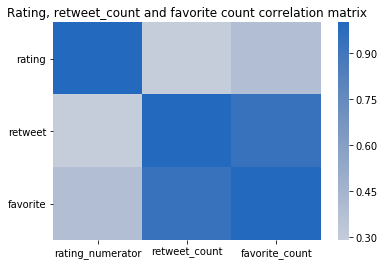

In [493]:
ax = sb.heatmap(corr_3, cmap = 'vlag_r', center = 0)
b,t = plt.ylim()
plt.yticks((0.5,1.5,2.5),('rating', 'retweet', 'favorite'))
plt.yticks(rotation = 0)
plt.ylim(b+0.5, t-0.5)
plt.title('Rating, retweet_count and favorite count correlation matrix');


Owner's rating is moderately correlated with both retweet_count and favorite_count. Retweet_count and favorite_count are highly correlated. All the correlations are positive.

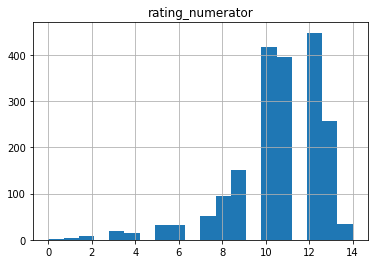

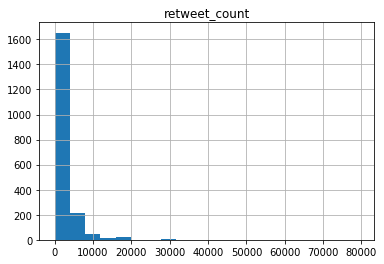

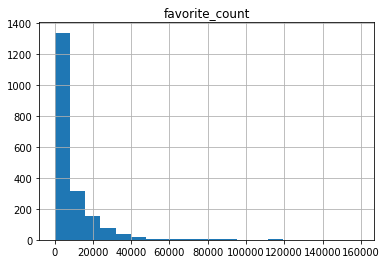

In [309]:
#first plot them indivicually
for metric in metrics_3:
    df.hist(column = metric, bins = 20 )

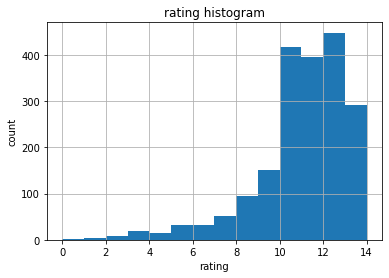

In [494]:
#adjust plots
df.hist('rating_numerator', bins = 14)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('rating histogram');

The owner's ratings follow a left-skewed distribution, while majority ranges from 10 to 14.

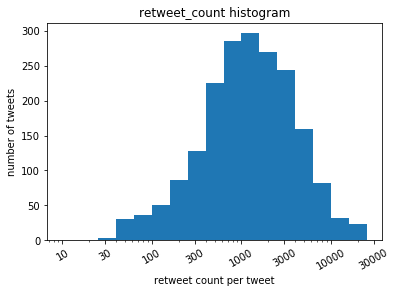

In [338]:
t_bins = 10**np.arange(1, 4.51, 0.2)
x_tks = [ 10, 30, 100, 300, 1000, 3000, 10000, 30000]
plt.hist(df['retweet_count'], bins = t_bins )
plt.title('retweet_count histogram')
plt.xlabel('retweet count per tweet')
plt.ylabel('number of tweets')
plt.xscale('log')
plt.xticks(x_tks, x_tks, rotation = 30);


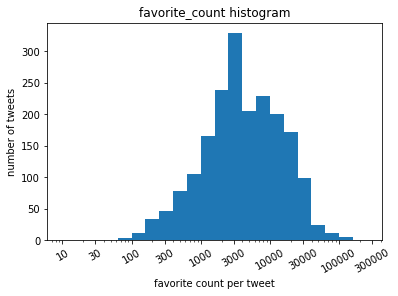

In [357]:
f_bins = 10**np.arange(1, 5.51, 0.2)
f_tks = [10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
plt.hist(df['favorite_count'], bins = f_bins )
plt.title('favorite_count histogram')
plt.xlabel('favorite count per tweet')
plt.ylabel('number of tweets')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30);


Retweet_count and favorite_count both follow log-normal-like distributions. Retweet_count distribution peaks between 1000~2000, while favorite_count distribution peaks at around 3000.

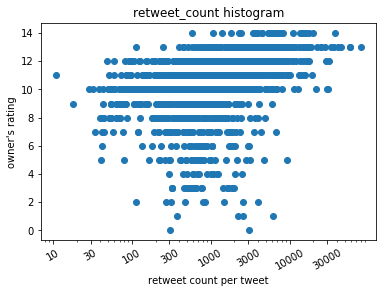

In [339]:
plt.scatter(data = df, x = 'retweet_count', y = 'rating_numerator')
plt.title('retweet_count histogram')
plt.xlabel('retweet count per tweet')
plt.ylabel("owner's rating")
plt.xscale('log')
plt.xticks(x_tks, x_tks, rotation = 30);


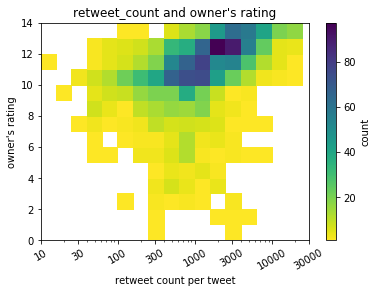

In [362]:
plt.hist2d(data = df, x = 'retweet_count', y = 'rating_numerator', bins = [t_bins, np.arange(15)],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("retweet_count and owner's rating")
plt.xlabel('retweet count per tweet')
plt.ylabel("owner's rating")
plt.xscale('log')
plt.colorbar(label = 'count')
plt.xticks(x_tks, x_tks, rotation = 30);


Owner's rating is moderately positively correlated with retweet_count.

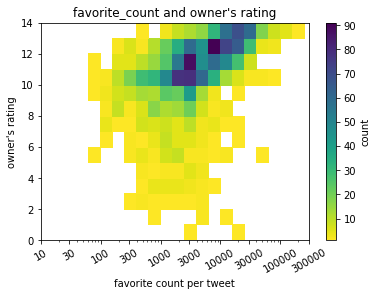

In [363]:
plt.hist2d(data = df, x = 'favorite_count', y = 'rating_numerator', bins = [f_bins, np.arange(15)],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("favorite_count and owner's rating" )
plt.xlabel('favorite count per tweet')
plt.ylabel("owner's rating")
plt.colorbar(label = 'count')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30);


Owner's rating is moderately correlated with favorite_count.

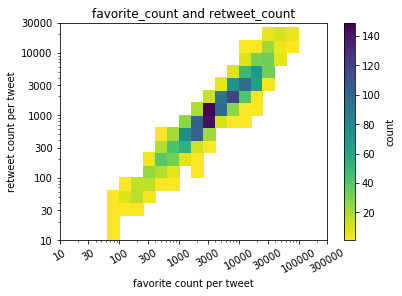

In [365]:
plt.hist2d(data = df, x = 'favorite_count', y = 'retweet_count', bins = [f_bins, t_bins],
           cmap = 'viridis_r', cmin = 0.5)
plt.title("favorite_count and retweet_count" )
plt.xlabel('favorite count per tweet')
plt.ylabel("retweet count per tweet")
plt.colorbar(label = 'count')
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30)
plt.yscale('log')
plt.yticks(x_tks, x_tks);


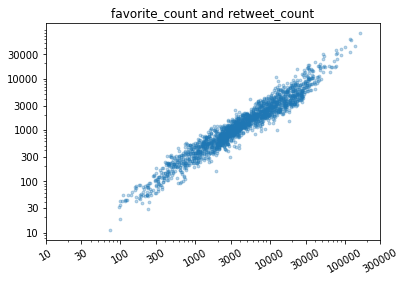

In [371]:
plt.scatter(data = df, x = 'favorite_count', y = 'retweet_count' ,alpha = 0.3,s =8)
plt.title("favorite_count and retweet_count" )
plt.xscale('log')
plt.xticks(f_tks, f_tks, rotation = 30)
plt.yscale('log')
plt.yticks(x_tks, x_tks);


Retweet_count is strongly correlated with favorite_count.

## Dog Breed Prediction and Popularity 

Focus on the 1st prediction: p1.

In [416]:
df.p1.value_counts().head(20)

golden_retriever             135
Labrador_retriever            90
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       39
toy_poodle                    37
Pomeranian                    37
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                19
Shetland_sheepdog             18
Staffordshire_bullterrier     18
Eskimo_dog                    18
Name: p1, dtype: int64

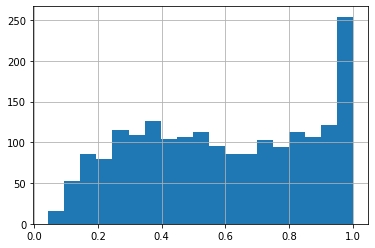

In [405]:
df.p1_conf.hist(bins = 19);

In [433]:
top_10_b = list(df.p1.value_counts().head(10).index)
top_10_b

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy_poodle',
 'Pomeranian',
 'malamute']

In [456]:
top_df = df[df.p1.isin(top_10_b)].copy()

In [ ]:
breed_t = pd.api.types.CategoricalDtype(categories = top_10_b, ordered = True)
top_df.p1 = top_df.p1.astype(breed_t)

In [472]:
top_10_b_2 = []
for br in top_10_b:
    top_10_b_2.append(br.replace('_',' '))
top_10_b_2

['golden retriever',
 'Labrador retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'chow',
 'Samoyed',
 'toy poodle',
 'Pomeranian',
 'malamute']

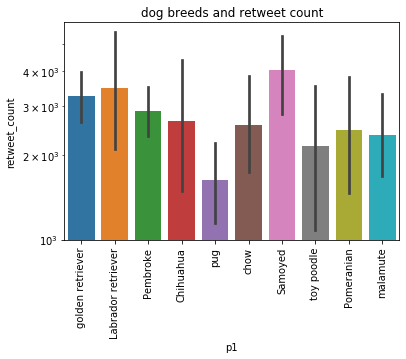

In [513]:
ax = sb.barplot(data = top_df, x = 'p1', y = 'retweet_count')
ax.set_xticklabels(top_10_b_2, rotation = 90)
plt.yscale('log')
plt.title('dog breeds and retweet count');

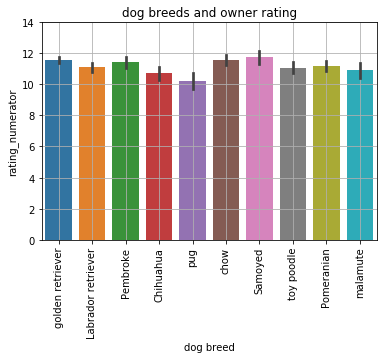

In [512]:
ax = sb.barplot(data = top_df, x = 'p1', y = 'rating_numerator')
ax.set_xticklabels(top_10_b_2, rotation = 90)
plt.ylim([0,14])
plt.grid('True')
plt.xlabel('dog breed')
plt.title('dog breeds and owner rating');

Samoyed is the most highly rated breed for owners, and also most retweeted breed among tweeters.

In [497]:
top_df[top_df.p1 == 'Samoyed'].rating_numerator.mean()

11.743589743589743

In [501]:
top_df[top_df.p1 == 'golden_retriever'].rating_numerator.mean()

11.574626865671641

In [499]:
top_df[top_df.p1 == 'pug'].rating_numerator.mean()

10.24074074074074

In [475]:
df.to_csv('tweeter_archive_master.csv', index = False)